In [1]:
# trying to reload the module when I make a change on it
# changed the from pointnet_classification import * to this, to try to reload
%load_ext autoreload
%autoreload 2

import pointnet_classification

In [2]:
train_dataset, test_dataset, num_points, num_classes, classmap = pointnet_classification.locate_and_parse_dataset()
model = pointnet_classification.create_model(num_points, num_classes)



GPU usage is set to : False.
processing class: bed
class map:bed
processing class: monitor
class map:monitor
processing class: desk
class map:desk
processing class: chair
class map:chair
processing class: dresser
class map:dresser
processing class: toilet
class map:toilet
processing class: sofa
class map:sofa
processing class: table
class map:table
processing class: night_stand
class map:night_stand
processing class: bathtub
class map:bathtub
Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['input_1[0][0]']                
                                      

loading weights
weights loaded


2023-07-01 12:00:11.542402: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 440ms/step


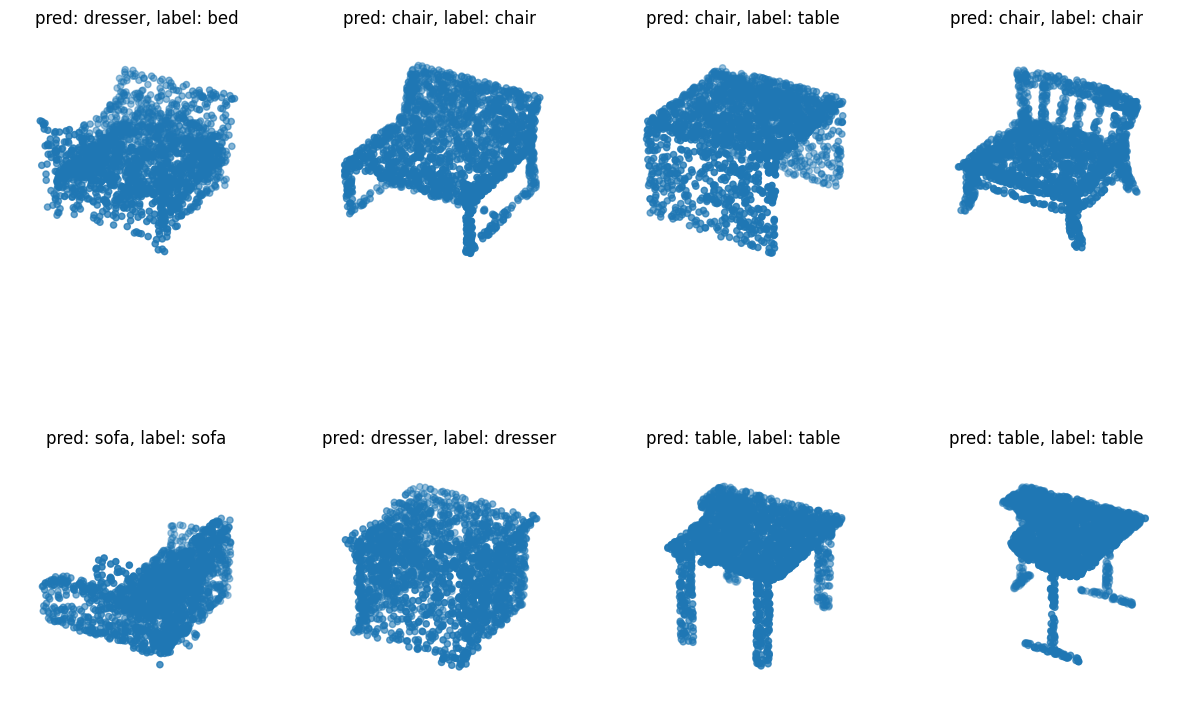

In [3]:
# if we want to train the model
# history = train_model(train_dataset, test_dataset, model, epochs=1)
# plot_history(history)
#save_weights()

# if we want to use a saved model


pointnet_classification.test_trained_model(test_dataset, model, classmap)




1/1 [==============================] - 1s 787ms/step


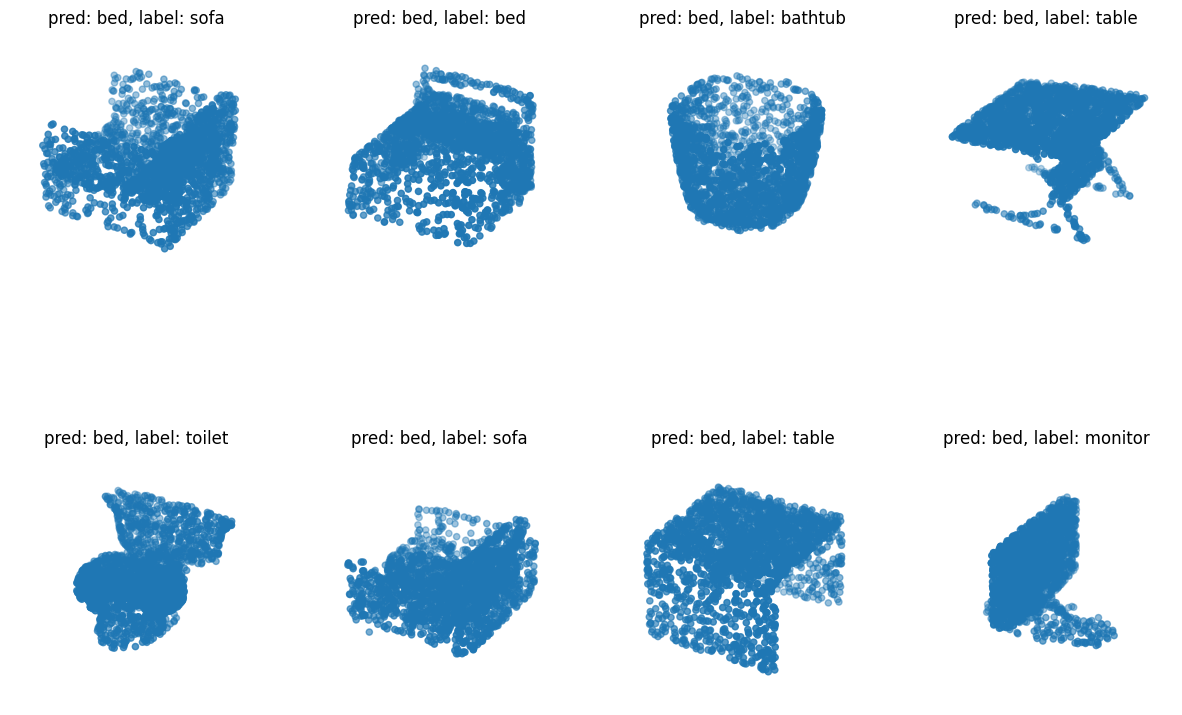

In [17]:
validate_model(test_dataset, model, classmap)

In [22]:
from pyntcloud import PyntCloud
my_point_cloud = PyntCloud.from_file("preprocessed_first_snapshot.pcd")
sampled_pc = my_point_cloud.get_sample('points_random', n=2048, as_PyntCloud=True)
sampled_pc.plot()

In [76]:
data = test_dataset.take(1)
points, labels = list(data)[0]
# formato: <tf.Tensor: shape=(32, 2048, 3), dtype=float64, numpy=array
points = points[:1, ...]
labels = labels[:8, ...]
# formato: <tf.Tensor: shape=(8, 2048, 3), dtype=float64, numpy= array
# preds = model.predict(points)
# preds = tf.math.argmax(preds, -1)
# preds

converted_pc=tf.convert_to_tensor(sampled_pc.points)
# formato: tf.Tensor: shape=(2048, 3), dtype=float32, numpy=array
converted_pc_3d = tf.expand_dims(converted_pc, axis=0)
converted_pc_3d_2 = tf.cast(converted_pc_3d, dtype=tf.float64)
# formato tf.Tensor: shape=(1, 2048, 3), dtype=float32,
pred = model.predict(converted_pc_3d_2)
print(pred)
pred = tf.math.argmax(pred, -1)

# print("pred: {:}".format(classmap[pred.numpy()]))
# CLASS_MAP[preds[i].numpy()]
# formato: tf.Tensor: shape=(1,), dtype=int64, numpy=array([0]
pred.numpy()[0]

#  0: 'bed',
#  1: 'monitor',
#  2: 'desk',
#  3: 'chair',
#  4: 'dresser',
#  5: 'toilet',
#  6: 'sofa',
#  7: 'table',
#  8: 'night_stand',
#  9: 'bathtub'}


1/1 [==============================] - 0s 47ms/step


0

processing class: bed
class map:bed
processing class: monitor
class map:monitor
processing class: desk
class map:desk
processing class: chair
class map:chair
processing class: dresser
class map:dresser
processing class: toilet
class map:toilet
processing class: sofa
class map:sofa
processing class: table
class map:table
processing class: night_stand
class map:night_stand
processing class: bathtub
class map:bathtub
Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['input_1[0][0]']                
                                                                     

2023-07-01 09:43:31.648122: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 522ms/step


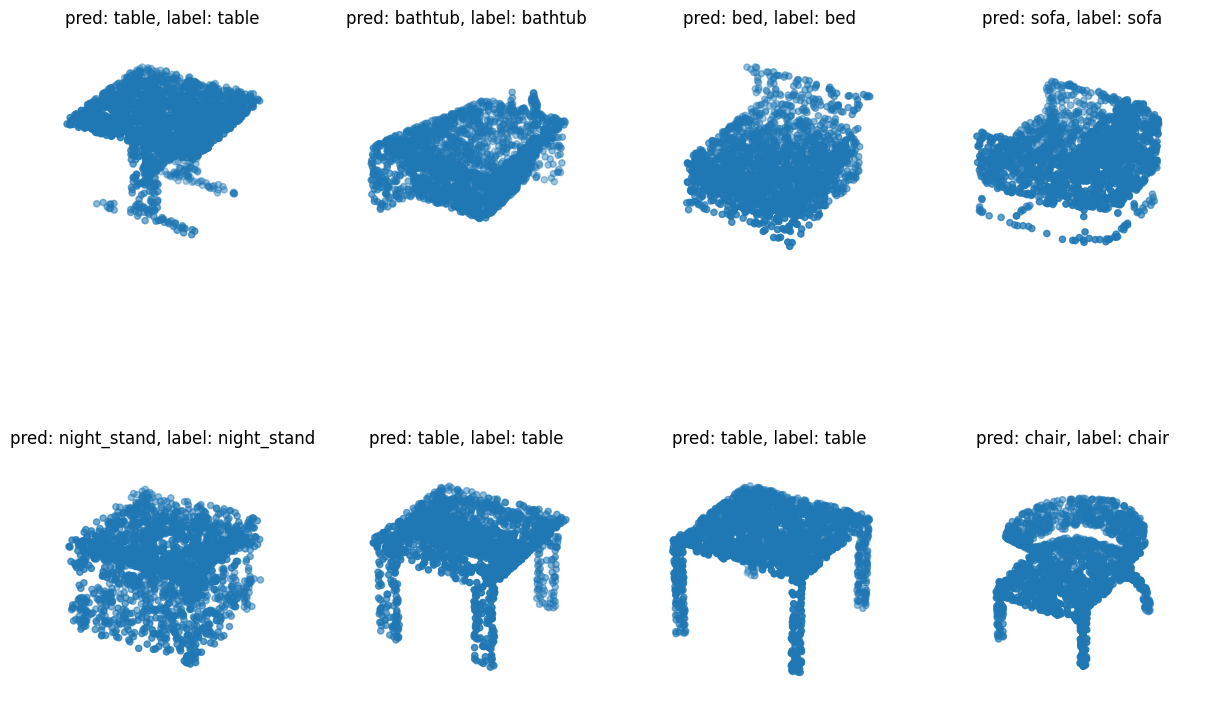

(<keras.engine.functional.Functional at 0x28fc152d0>,
 {0: 'bed',
  1: 'monitor',
  2: 'desk',
  3: 'chair',
  4: 'dresser',
  5: 'toilet',
  6: 'sofa',
  7: 'table',
  8: 'night_stand',
  9: 'bathtub'})